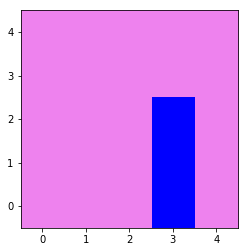

In [57]:
import numpy as np
from evol_games import GamesRunner
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

class lattice_gameboard:
    def __init__(self, game="PD", rows=30, columns=30, agents=("A1","A2","TFT", "nTFT"), weights=None):
        self.columns = columns
        self.rows = rows
        self.shape = [self.rows,self.columns]
        self.game = game

        self.paired_payoff_matrix = GamesRunner().calc_payoffs(game=self.game)
        self.agents = agents
        if weights is None:
            weights = [1/len(self.agents)] * 4
        self.weights = weights
        self.populate_lattice()
        #print(self.agent_lattice)
        self.draw_lattice(self.agent_lattice)
        for i in range(0,10):
            self.run_generation()
        
    def run_generation(self):
        self.calculate_payoffs()
        self.update_lattice()
        self.draw_lattice(self.agent_lattice)

    def populate_lattice(self):
        """ This populates a lattice with a mix of agents
        """
        #np.random.randint(0,4,[30,30])
        self.agent_lattice = np.random.choice(a=self.agents,size=[self.rows,self.columns],p=self.weights)

    def update_lattice(self):
        """ This updates the lattice where each cell adopts the strategy of the most successful neighbor
        """
        #print(np.indices(self.shape))
        #neighbors = self.neighbor_indices(np.indices(self.shape))
        #neighbor_agents = self.agent_lattice[neighbors[:,0], neighbors[:,1]]
        new_lattice = self.agent_lattice.copy()
        for i in range(0,self.rows):
            for j in range(0, self.columns):
                neighbors = self.neighbor_indices([i,j])
                neighbor_idx = (neighbors[:,0], neighbors[:,1])
                neighbor_agents = self.agent_lattice[neighbor_idx]
                best_index = np.argmax(self.payoffs[neighbor_idx])
                new_lattice[i,j] = neighbor_agents[best_index]
#                 print(best_index)
#                 print(self.payoffs[neighbor_idx])
#                 print(neighbor_agents)
        self.agent_lattice = new_lattice
    
    def neighbor_indices(self, index):
        """ Return indices of neighbors. This includes the original cell as a "neighbor".
        Assumes a square lattice
        Args:
            index (x,y tuple)
        Returns:
            list of x,y tuples for all neighbors
        """
        return (np.add(cartesian_product([-1, 0, 1], [-1, 0, 1]), index )) % self.rows

    def calculate_payoffs(self):
        """ This calculates the payoffs of the lattice
        """
        payoffs = np.zeros([self.rows, self.columns])
        for i in range(0,self.rows):
            for j in range(0, self.columns):
                payoffs[i,j] = self.calculate_cell_payoff(i,j)
        self.payoffs = payoffs

    def calculate_cell_payoff(self,i,j):
        """ Calculate the payoff of a cell
        """
        central_agent = self.agent_lattice[i,j]
        #print(central_agent)
        neighbors = self.neighbor_indices([i,j])
        neighbor_agents = self.agent_lattice[neighbors[:,0], neighbors[:,1]]
        
        # Remove central agent
        neighbor_agents = np.delete(arr=neighbor_agents, obj=4, axis=0)

        r = 0
        for agent in neighbor_agents:
            #print(agent)
            r += self.paired_payoff_matrix[(central_agent,agent)][0]
        return r/9
    
    def draw_lattice(self, lattice):
        cmap = mpl.colors.ListedColormap(['blue','red','green', 'violet'])
        categories, integer_encoding = np.unique(lattice, return_inverse=True)
        integer_encoding = integer_encoding.reshape([self.rows,self.columns])
        plt.imshow(integer_encoding, interpolation='nearest', cmap=cmap, origin='lower')

    def print_summary(self):
        pass
    
def cartesian_product(arr1, arr2):
    return np.transpose([np.tile(arr1, len(arr2)), np.repeat(arr2, len(arr1))])

#payoffs[('TFT', 'nTFT')]

if __name__ == '__main__':
    lg = lattice_gameboard(rows=5, columns=5)
    gameboard = lg.agent_lattice

In [15]:
ind = [[2],[3]]
gameboard[tuple(ind)]

array(['nTFT'], dtype='<U4')